In [1]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
# local imports
import Plotting as myplt

In [2]:
# paths
path_fig  = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab1 - Two Slit Interference\\Figures\\'
path_data = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab1 - Two Slit Interference\\Data\\'

# Data

In [3]:
# store files names for all datasets
filenames: dict[str,str] = {
   'Laser 1s'   : path_data + '2-Slit Interference Lab - Laser Single Slit-8_24_23.csv',
   'Laser 2s'   : path_data + '2-Slit Interference Lab - Laser Interference Pattern (fine)-8_24_23.csv',
   'Bulb 2s t1' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern-8_31_23.csv',
   'Bulb 2s t2' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern 2.csv',
   'Bulb 2s t3' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern 3.csv',
   'Bulb 1s'    : path_data + '2-Slit Interference Lab - Bulb Single Slit-9_19_23.csv'
} # s==slit, t==trial

In [4]:
def UnpackTable(fname: str) -> dict[str,np.array] :
    """Get a table dictionary like {x: xdata, y: ydata} from a CSV file containing data""" 
    # get data from the csv file
    arr = np.genfromtxt(fname, delimiter=",", dtype=str)
    # separate column names and data arrays 
    cols = np.array(arr[0 ], dtype=str)
    data = np.array(arr[1:], dtype=float).T # transpose to get x and y
    # build dictionary to hold the table {x: xdata, y: ydata}
    table = {}
    for col, dat in zip(cols,data) : 
        table[col] = dat
    return table

def UnpackAllTables(filenames: dict[str,str]) -> dict[str, dict[str, np.array]] : 
    """Unpack all tables in the filenames dictionary."""
    tables: dict[str, dict[str, np.array]] = {}
    for experiment, file in filenames.items() :
        # extract data from file 
        tables[experiment] = UnpackTable(file)
        # print some helpful info 
        print(experiment, 'columns:\t', list(tables[experiment].keys() ))
    return tables

tables: dict[str, dict[str, np.array]] = UnpackAllTables(filenames)

Laser 1s columns:	 ['Micrometer Position (mm)', 'Voltage (V)']
Laser 2s columns:	 ['Micrometer Position (mm)', 'Voltage (V)']
Bulb 2s t1 columns:	 ['Micrometer Position (mm)', 'Counts/10s', 'Photon/S (Hz)']
Bulb 2s t2 columns:	 ['Micrometer Position (mm)', 'counts/10s', 'Photon/S (Hz)']
Bulb 2s t3 columns:	 ['Micrometer Position (mm)', 'counts/10s', 'Photon/S (Hz)']
Bulb 1s columns:	 ['Micrometer Position (mm)', 'counts/10s', 'Photon/S (Hz)']


In [5]:
# find maxima
def GetI0(tables: dict[str, dict[str, np.array]]) : 
    """Gets the value of the central maximum as I0"""
    # loop for each item 
    for keyExperiment,valueDict in tables.items() : 
        if('Voltage (V)' in valueDict) : 
            valueDict['I0'] = max(valueDict['Voltage (V)'])
        elif('Photon/S (Hz)' in valueDict) :
            valueDict['I0'] = max(valueDict['Photon/S (Hz)'])
        else : 
            raise Exception('Invalid key')
        print(keyExperiment, 'I0 :\t',valueDict['I0'])
        
GetI0(tables)

Laser 1s I0 :	 0.288
Laser 2s I0 :	 0.41
Bulb 2s t1 I0 :	 251.6
Bulb 2s t2 I0 :	 240.0
Bulb 2s t3 I0 :	 243.3
Bulb 1s I0 :	 86.3


# Fit

In [6]:
def GetXShift(tables, experimentKey, xKey, yKey) : 
    return tables[experimentKey][xKey] [ # get x position of maximum
            np.where( 
                tables[experimentKey][yKey] == max(tables[experimentKey][yKey]) # get index of maximum 
            ) [0] 
        ]

def GetYShift(tables, experimentKey, yKey) : 
    return tables[experimentKey][yKey] [0] # assumes edge is noise 

def GetX(range=(-8, 8)) : 
    return np.linspace(range[0], range[1], 1000)


In [7]:
def Interference_v2(x, I0, beta) : 
    return I0 * (np.cos(x*beta))**2

def Envelope_v2(x, I0, alpha) : 
    return I0 * (np.sin(x*alpha) / (x*alpha))**2

def I_v2(x, I0, beta, alpha) : 
    return I0 * (np.sin(x*alpha) / (x*alpha))**2 * (np.cos(x*beta))**2

## Fit Red

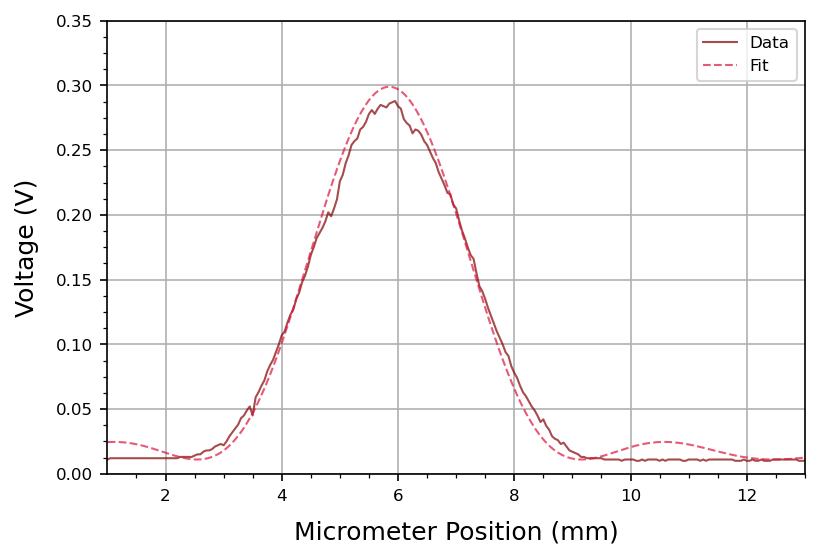

In [8]:
def Go() : 
    expKey = 'Laser 1s'
    tables[expKey]['Beta'] = 0
    tables[expKey]['Alpha']  = 0.95
    xfit = GetX()
    yfit = I_v2(xfit, tables[expKey]['I0'], tables[expKey]['Beta'], tables[expKey]['Alpha'])
    # yfit = Envelope_v2(xfit, tables[expKey]['I0'], tables[expKey]['Alpha'])
    myplt.PlotMultiXY(
        x = [   tables[expKey]['Micrometer Position (mm)'], 
                xfit + GetXShift(tables, expKey, 'Micrometer Position (mm)', 'Voltage (V)') - 0.1],
        y = [   tables[expKey]['Voltage (V)'],
                yfit + GetYShift(tables, expKey, 'Voltage (V)') ],
        color       = [ 'maroon', 'crimson' ],
        linestyle   = ['-','--'],
        legend      = [ 'Data', 'Fit' ],
        xlab        = 'Micrometer Position (mm)',
        ylab        = 'Voltage (V)',
        xlim        = [ 1, 13 ],
        ylim        = [ 0, 0.35 ],
        fileName    = path_fig + 'Fit_Laser1s.png'
    )
Go()

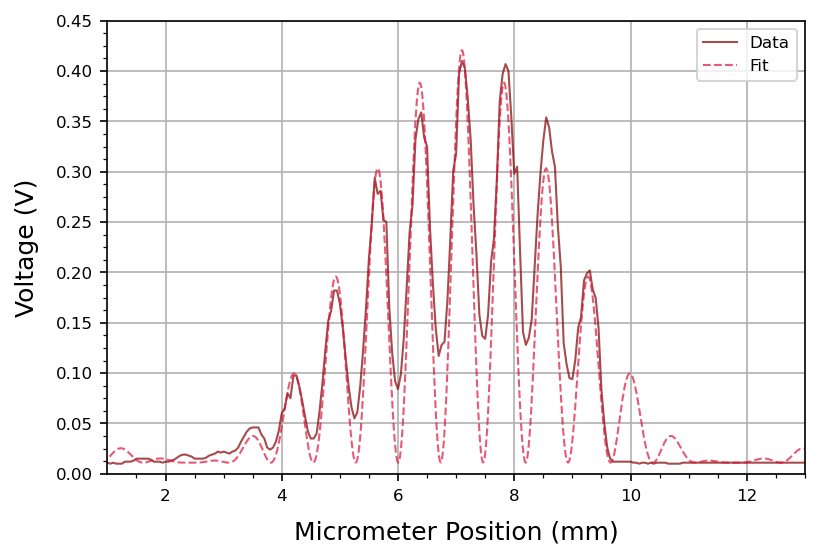

In [9]:
def Go() : 
        expKey = 'Laser 2s'
        tables[expKey]['Beta'] = 4.3
        tables[expKey]['Alpha']  = 0.68
        xfit = GetX()
        yfit = I_v2(xfit, tables[expKey]['I0'], tables[expKey]['Beta'], tables[expKey]['Alpha'])
        # yfit = Envelope_v2(xfit, tables[expKey]['I0'], tables[expKey]['Alpha'])
        # yfit = Interference_v2(xfit, tables[expKey]['I0'], tables[expKey]['Beta'])
        myplt.PlotMultiXY(
            x = [   tables[expKey]['Micrometer Position (mm)'], 
                    xfit + GetXShift(tables, expKey, 'Micrometer Position (mm)', 'Voltage (V)') ],
            y = [   tables[expKey]['Voltage (V)'],
                    yfit + GetYShift(tables, expKey, 'Voltage (V)') ],
            color       = [ 'maroon', 'crimson' ],
            linestyle   = ['-','--'],
            legend      = [ 'Data', 'Fit' ],
            xlab        = 'Micrometer Position (mm)',
            ylab        = 'Voltage (V)',
            xlim        = [ 1, 13 ],
            ylim        = [ 0, 0.45 ],
            fileName    = path_fig + 'Fit_Laser2s.png'
        )
Go()

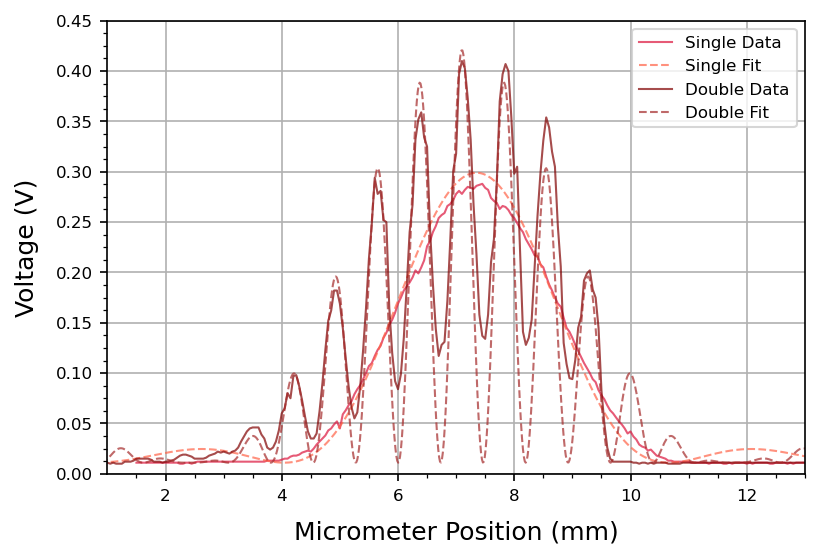

In [10]:
def Go() : 
        xfit_1s = GetX()
        yfit_1s = I_v2(xfit_1s, tables['Laser 1s']['I0'], tables['Laser 1s']['Beta'], tables['Laser 1s']['Alpha'])
        xfit_2s = GetX()
        yfit_2s = I_v2(xfit_2s, tables['Laser 2s']['I0'], tables['Laser 2s']['Beta'], tables['Laser 2s']['Alpha'])

        myplt.PlotMultiXY(
            x = [   tables['Laser 1s']['Micrometer Position (mm)'] + 1.5, 
                    xfit_1s + GetXShift(tables, 'Laser 1s', 'Micrometer Position (mm)', 'Voltage (V)') - 0.1 + 1.5,
                    tables['Laser 2s']['Micrometer Position (mm)'], 
                    xfit_2s + GetXShift(tables, 'Laser 2s', 'Micrometer Position (mm)', 'Voltage (V)'),],
            y = [   tables['Laser 1s']['Voltage (V)'],
                    yfit_1s + GetYShift(tables, 'Laser 1s', 'Voltage (V)'),
                    tables['Laser 2s']['Voltage (V)'],
                    yfit_2s + GetYShift(tables, 'Laser 2s', 'Voltage (V)'), ],
            color       = [ 'crimson', 'tomato','maroon', 'brown', ],
            linestyle   = ['-','--','-','--'],
            legend      = [ 'Single Data', 'Single Fit','Double Data', 'Double Fit', ],
            xlab        = 'Micrometer Position (mm)',
            ylab        = 'Voltage (V)',
            xlim        = [ 1, 13 ],
            ylim        = [ 0, 0.45 ],
            fileName    = path_fig + 'Fit_Laser1s2s.png'
        )
Go()

## Fit Green

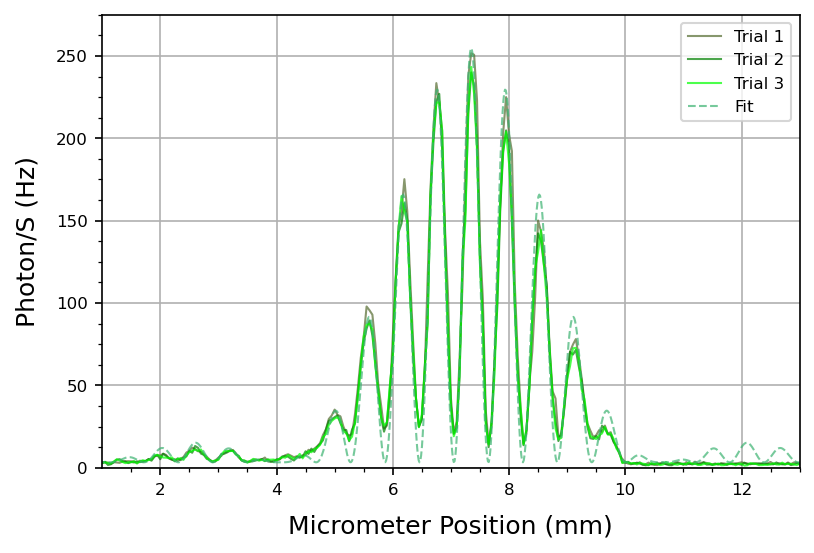

In [11]:
I0avg = ( tables['Bulb 2s t1']['I0'] + tables['Bulb 2s t1']['I0'] + tables['Bulb 2s t1']['I0'] ) / 3.
def Go() :
    for bulb2s in ['Bulb 2s t1', 'Bulb 2s t2', 'Bulb 2s t3'] : # set same for all
        tables[bulb2s]['Beta'] = 5.3
        tables[bulb2s]['Alpha']  = 0.95
    expKey = 'Bulb 2s t1'
    xfit = GetX((-7,7))
    yfit = I_v2(xfit, I0avg, tables[expKey]['Beta'], tables[expKey]['Alpha'])
    # yfit = Envelope_v2(xfit,I0avg,tables[expKey]['Alpha'] )
    # yfit = Interference_v2(xfit,I0avg,tables[expKey]['Beta'])
    myplt.PlotMultiXY(
        x = [   tables['Bulb 2s t1']['Micrometer Position (mm)']+0.5, # shift right to align with other lines
                tables['Bulb 2s t2']['Micrometer Position (mm)'],
                tables['Bulb 2s t3']['Micrometer Position (mm)'],
                xfit + GetXShift(tables, expKey, 'Micrometer Position (mm)', 'Photon/S (Hz)') + 0.5 ],
        y = [   tables['Bulb 2s t1']['Photon/S (Hz)'],
                tables['Bulb 2s t2']['Photon/S (Hz)'],
                tables['Bulb 2s t3']['Photon/S (Hz)'],
                yfit + GetYShift(tables, expKey, 'Photon/S (Hz)') ],
        xlab        = 'Micrometer Position (mm)',
        ylab        = 'Photon/S (Hz)',
        color       = [ 'darkolivegreen', 'green', 'lime','mediumseagreen' ],
        linestyle   = [ '-', '-', '-','--' ],
        legend      = [ 'Trial 1', 'Trial 2', 'Trial 3', 'Fit' ],
        xlim        = [1,13],
        ylim        = [0,275],
        fileName = path_fig + 'Fit_Bulb2st123.png'
    )
Go() 

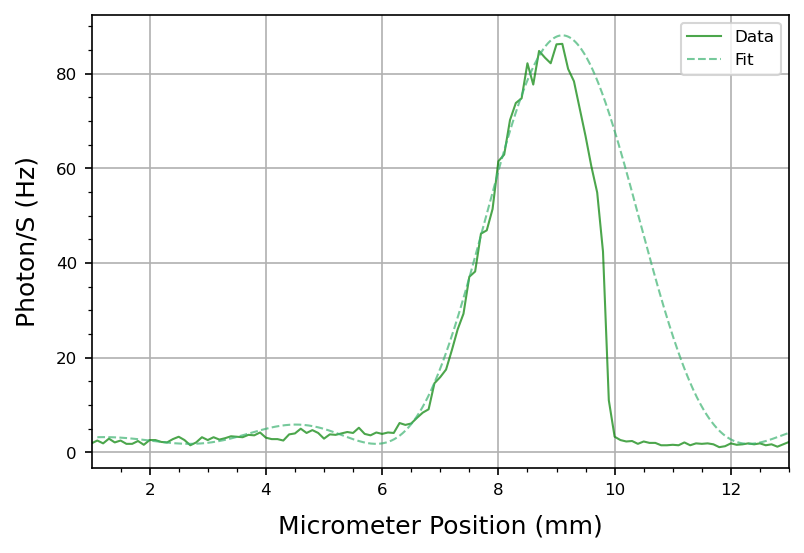

In [12]:
def Go() :
    expKey = 'Bulb 1s'
    tables[expKey]['Beta'] = 0
    tables[expKey]['Alpha']  = 0.98
    xfit = GetX()
    yfit = I_v2(xfit, tables[expKey]['I0'], tables[expKey]['Beta'], tables[expKey]['Alpha'])
    # yfit = Envelope_v2(xfit, tables[expKey]['I0'], tables[expKey]['Alpha'])

    myplt.PlotMultiXY(
        x = [   tables[expKey]['Micrometer Position (mm)'], 
                xfit + GetXShift(tables, expKey, 'Micrometer Position (mm)', 'Photon/S (Hz)') ],
        y = [   tables[expKey]['Photon/S (Hz)'],
                yfit + GetYShift(tables, expKey, 'Photon/S (Hz)') ],
        color       = [ 'green', 'mediumseagreen' ],
        linestyle   = ['-','--'],
        legend      = [ 'Data', 'Fit' ],
        xlab        = 'Micrometer Position (mm)',
        ylab        = 'Photon/S (Hz)',
        xlim        = [ 1, 13 ],
    #     ylim        = [ 0, 0.35 ],
        fileName    = path_fig + 'Fit_Bulb1s.png'
    )
Go()

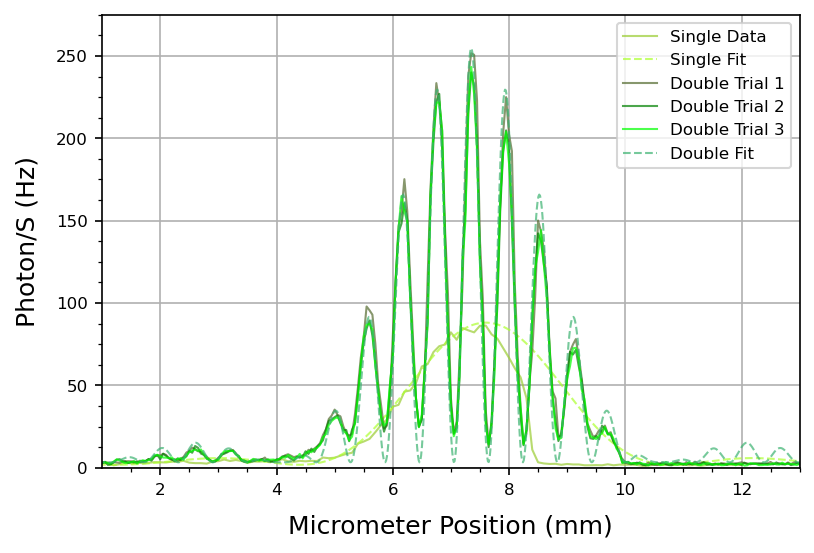

In [13]:
def Go() :
    xfit_1s = GetX()
    yfit_1s = I_v2(xfit_1s, tables['Bulb 1s']['I0'], tables['Bulb 1s']['Beta'], tables['Bulb 1s']['Alpha'])
    xfit_2s = GetX((-7,7))
    yfit_2s = I_v2(xfit_2s, I0avg, tables['Bulb 2s t1']['Beta'], tables['Bulb 2s t1']['Alpha'])

    myplt.PlotMultiXY(
        x = [   tables['Bulb 1s']['Micrometer Position (mm)']- 1.5, 
                xfit_1s + GetXShift(tables, 'Bulb 1s', 'Micrometer Position (mm)', 'Photon/S (Hz)')- 1.5, 
                tables['Bulb 2s t1']['Micrometer Position (mm)']+0.5, # shift right to align with other lines
                tables['Bulb 2s t2']['Micrometer Position (mm)'],
                tables['Bulb 2s t3']['Micrometer Position (mm)'],
                xfit_2s + GetXShift(tables, 'Bulb 2s t1', 'Micrometer Position (mm)', 'Photon/S (Hz)') + 0.5 ],
        y = [   tables['Bulb 1s']['Photon/S (Hz)'],
                yfit_1s + GetYShift(tables, 'Bulb 1s', 'Photon/S (Hz)'),
                tables['Bulb 2s t1']['Photon/S (Hz)'],
                tables['Bulb 2s t2']['Photon/S (Hz)'],
                tables['Bulb 2s t3']['Photon/S (Hz)'],
                yfit_2s + GetYShift(tables, 'Bulb 2s t1', 'Photon/S (Hz)') ],
        xlab        = 'Micrometer Position (mm)',
        ylab        = 'Photon/S (Hz)',
        color       = [ 'yellowgreen', 'greenyellow', 'darkolivegreen', 'green', 'lime','mediumseagreen' ],
        linestyle   = [ '-','--','-', '-', '-','--' ],
        legend      = [ 'Single Data','Single Fit','Double Trial 1', 'Double Trial 2', 'Double Trial 3', 'Double Fit' ],
        xlim        = [1,13],
        ylim        = [0,275],
        fileName = path_fig + 'Fit_Bulb1s2s.png'
    )
Go() 

# Overplotting Red Green

In [14]:
lam_green = (551. + 541.)/2
lam_red = 670.
lamRatio_redgreen =  lam_red / lam_green
print(lamRatio_redgreen)

1.2271062271062272


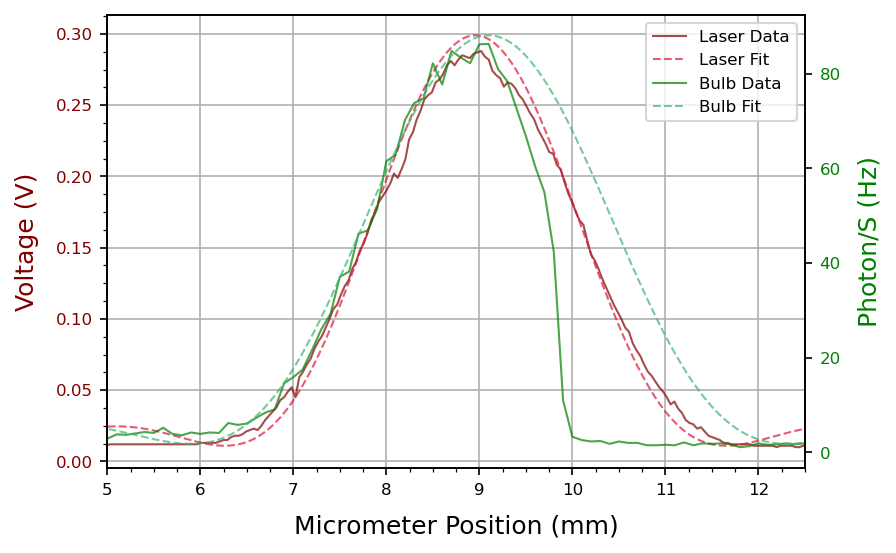

In [15]:
def Go() : 
    # get laser fit
    xfit_laser = GetX()
    yfit_laser = I_v2(xfit_laser, tables['Laser 1s']['I0'], tables['Laser 1s']['Beta'], tables['Laser 1s']['Alpha'])
    # get bulb fit
    xfit_bulb = GetX()
    yfit_bulb = I_v2(xfit_bulb, tables['Bulb 1s']['I0'], tables['Bulb 1s']['Beta'], tables['Bulb 1s']['Alpha'])

    # plot
    myplt.PlotMultiXY_DualY(
        # y axis 1
        x_ax1       = [ tables['Laser 1s']['Micrometer Position (mm)']/(lamRatio_redgreen) + 4.17,
                        (xfit_laser + GetXShift(tables, 'Laser 2s', 'Micrometer Position (mm)', 'Voltage (V)'))/(lamRatio_redgreen) + 4.17 - 1],
        y_ax1       = [ tables['Laser 1s']['Voltage (V)'],
                        yfit_laser + GetYShift(tables, 'Laser 2s', 'Voltage (V)')],
        ylab_ax1    = 'Voltage (V)',        
        color_ax1   = ['maroon', 'crimson'],      
        linestyle_ax1 = ['-','--'],  
        legend_ax1  = ['Laser Data', 'Laser Fit'],     
        # y axis 2
        x_ax2       = [ tables['Bulb 1s']['Micrometer Position (mm)'],
                        xfit_bulb + GetXShift(tables, 'Bulb 1s', 'Micrometer Position (mm)', 'Photon/S (Hz)')],
        y_ax2       = [ tables['Bulb 1s']['Photon/S (Hz)'],
                        yfit_bulb + GetYShift(tables, 'Bulb 1s', 'Photon/S (Hz)') ],
        ylab_ax2    ='Photon/S (Hz)',        
        color_ax2   = ['green','mediumseagreen' ],      
        linestyle_ax2 = ['-','--'],  
        legend_ax2  = ['Bulb Data', 'Bulb Fit'],     
        # shared properties 
        xlab        = 'Micrometer Position (mm)',            
        xlim        = [5,12.5], 
        fileName    = path_fig + 'Fit_Laser1s_Bulb1s.png'
    )
Go() 


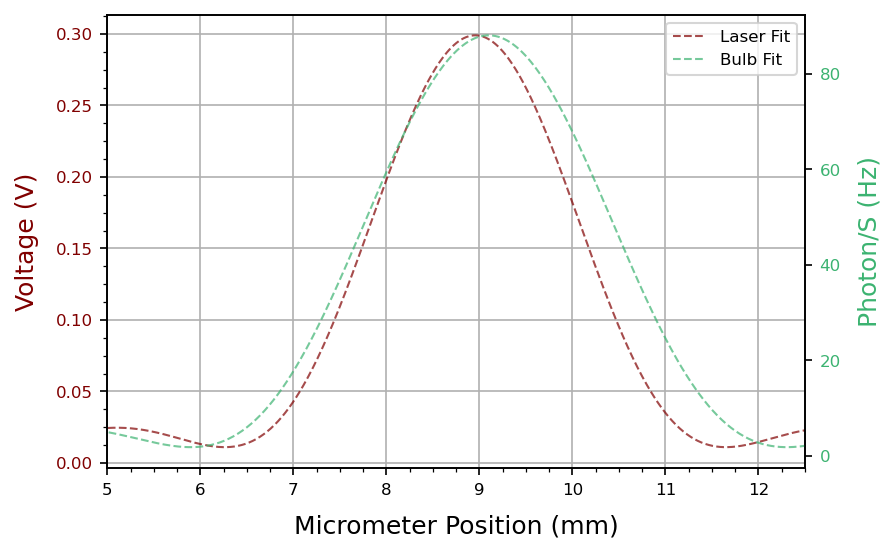

In [16]:
def Go() : 
    # get laser fit
    xfit_laser = GetX()
    yfit_laser = I_v2(xfit_laser, tables['Laser 1s']['I0'], tables['Laser 1s']['Beta'], tables['Laser 1s']['Alpha'])
    # get bulb fit
    xfit_bulb = GetX()
    yfit_bulb = I_v2(xfit_bulb, tables['Bulb 1s']['I0'], tables['Bulb 1s']['Beta'], tables['Bulb 1s']['Alpha'])

    # plot
    myplt.PlotMultiXY_DualY(
        # y axis 1
        x_ax1       = [ (xfit_laser + GetXShift(tables, 'Laser 2s', 'Micrometer Position (mm)', 'Voltage (V)'))/(lamRatio_redgreen) + 4.17 - 1],
        y_ax1       = [ yfit_laser + GetYShift(tables, 'Laser 2s', 'Voltage (V)')],
        ylab_ax1    = 'Voltage (V)',        
        color_ax1   = ['maroon', 'crimson'],      
        linestyle_ax1 = ['--'],  
        legend_ax1  = ['Laser Fit'],     
        # y axis 2
        x_ax2       = [ xfit_bulb + GetXShift(tables, 'Bulb 1s', 'Micrometer Position (mm)', 'Photon/S (Hz)')],
        y_ax2       = [ yfit_bulb + GetYShift(tables, 'Bulb 1s', 'Photon/S (Hz)') ],
        ylab_ax2    ='Photon/S (Hz)',        
        color_ax2   = ['mediumseagreen'], # something about mediumaquamarine makes the background transparent? It saves white so its ok I guess
        linestyle_ax2 = ['--'],  
        legend_ax2  = ['Bulb Fit'],     
        # shared properties 
        xlab        = 'Micrometer Position (mm)',            
        xlim        = [5,12.5], 
        fileName    = path_fig + 'Fit_1s.png'
    )
Go() 


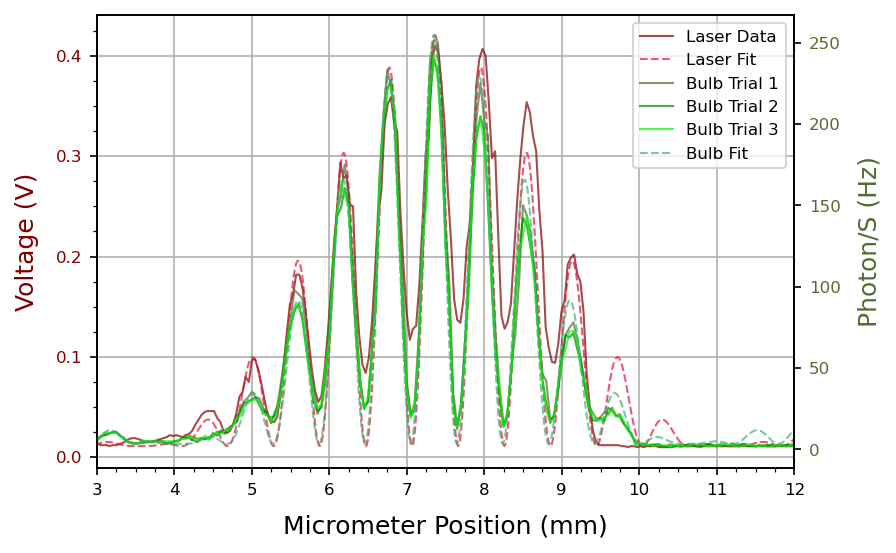

In [17]:
def Go() :
    # get laser fit
    xfit_laser = GetX() 
    yfit_laser = I_v2(xfit_laser, tables['Laser 2s']['I0'], tables['Laser 2s']['Beta'], tables['Laser 2s']['Alpha'])
    # get bulb fit
    xfit_bulb = GetX((-7,7))
    yfit_bulb = I_v2(xfit_bulb, I0avg, tables['Bulb 2s t1']['Beta'], tables['Bulb 2s t1']['Alpha'])

    # plot
    myplt.PlotMultiXY_DualY(
        # y axis 1
        x_ax1       = [ tables['Laser 2s']['Micrometer Position (mm)']/(lamRatio_redgreen) + 1.58,
                        (xfit_laser + GetXShift(tables, 'Laser 2s', 'Micrometer Position (mm)', 'Voltage (V)'))/(lamRatio_redgreen) + 1.58 ],
        y_ax1       = [ tables['Laser 2s']['Voltage (V)'],
                        yfit_laser + GetYShift(tables, 'Laser 2s', 'Voltage (V)')],
        ylab_ax1    = 'Voltage (V)',        
        color_ax1   = ['maroon', 'crimson'],      
        linestyle_ax1 = ['-','--'],  
        legend_ax1  = ['Laser Data', 'Laser Fit'],     
        # y axis 2
        x_ax2       = [ tables['Bulb 2s t1']['Micrometer Position (mm)']+0.5, # shift right to align with other lines
                        tables['Bulb 2s t2']['Micrometer Position (mm)'],
                        tables['Bulb 2s t3']['Micrometer Position (mm)'],
                        xfit_bulb + GetXShift(tables, 'Bulb 2s t1', 'Micrometer Position (mm)', 'Photon/S (Hz)') + 0.5 ],
        y_ax2       = [ tables['Bulb 2s t1']['Photon/S (Hz)'],
                        tables['Bulb 2s t2']['Photon/S (Hz)'],
                        tables['Bulb 2s t3']['Photon/S (Hz)'],
                        yfit_bulb + GetYShift(tables, 'Bulb 2s t1', 'Photon/S (Hz)') ],
        ylab_ax2    ='Photon/S (Hz)',        
        color_ax2   = ['darkolivegreen','green','lime','mediumseagreen' ],      
        linestyle_ax2 = ['-','-','-', '--'],  
        legend_ax2  = ['Bulb Trial 1', 'Bulb Trial 2', 'Bulb Trial 3', 'Bulb Fit'],     
        # shared properties 
        xlab        = 'Micrometer Position (mm)',            
        xlim        = [3,12], 
        fileName    = path_fig + 'Fit_Laser2s_Bulb2st123.png'
    )
Go()

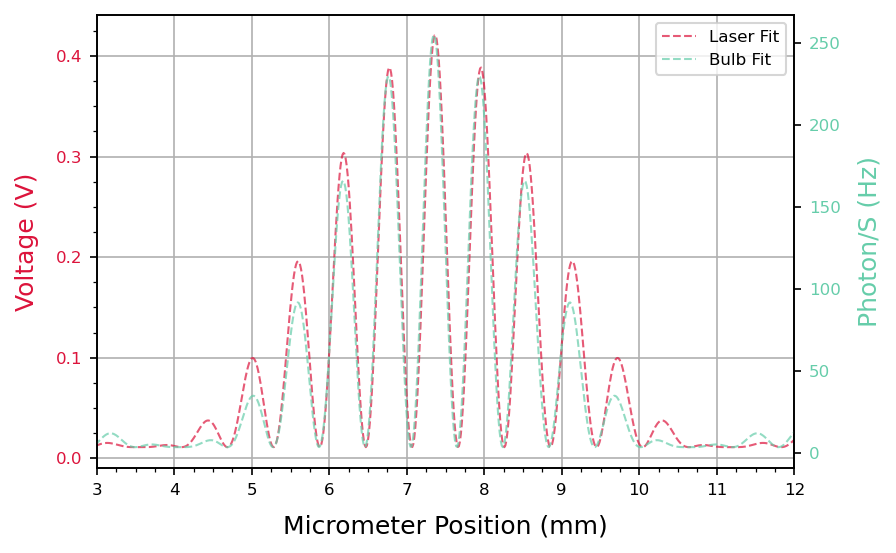

In [18]:
def Go() :
    # get laser fit
    xfit_laser = GetX()
    yfit_laser = I_v2(xfit_laser, tables['Laser 2s']['I0'], tables['Laser 2s']['Beta'], tables['Laser 2s']['Alpha'])
    # get bulb fit
    xfit_bulb = GetX((-7,7))
    yfit_bulb = I_v2(xfit_bulb, I0avg, tables['Bulb 2s t1']['Beta'], tables['Bulb 2s t1']['Alpha'])

    # plot
    myplt.PlotMultiXY_DualY(
        # y axis 1
        x_ax1       = [(xfit_laser + GetXShift(tables, 'Laser 2s', 'Micrometer Position (mm)', 'Voltage (V)'))/(lamRatio_redgreen) + 1.58 ],
        y_ax1       = [ yfit_laser + GetYShift(tables, 'Laser 2s', 'Voltage (V)')],
        ylab_ax1    = 'Voltage (V)',        
        color_ax1   = ['crimson'],      
        linestyle_ax1 = ['--'],  
        legend_ax1  = ['Laser Fit'],     
        # y axis 2
        x_ax2       = [ xfit_bulb + GetXShift(tables, 'Bulb 2s t1', 'Micrometer Position (mm)', 'Photon/S (Hz)') + 0.5 ],
        y_ax2       = [ yfit_bulb + GetYShift(tables, 'Bulb 2s t1', 'Photon/S (Hz)') ],
        ylab_ax2    ='Photon/S (Hz)',        
        color_ax2   = ['mediumaquamarine'], # something about mediumaquamarine makes the background transparent? It saves white so its ok I guess
        linestyle_ax2 = ['--'],  
        legend_ax2  = ['Bulb Fit'],     
        # shared properties 
        xlab        = 'Micrometer Position (mm)',            
        xlim        = [3,12], 
        fileName    = path_fig + 'Fit_2s.png'
    )
Go()

In [23]:
def PrintAlphaBeta(table: dict[str, dict]) : 
    for keyExperiment,valueDict in tables.items() : 
        print(keyExperiment, ':\t alpha =', valueDict['Alpha'], '.\t Beta =', valueDict['Beta'])

PrintAlphaBeta(tables)

Laser 1s :	 alpha = 0.95 .	 Beta = 0
Laser 2s :	 alpha = 0.68 .	 Beta = 4.3
Bulb 2s t1 :	 alpha = 0.95 .	 Beta = 5.3
Bulb 2s t2 :	 alpha = 0.95 .	 Beta = 5.3
Bulb 2s t3 :	 alpha = 0.95 .	 Beta = 5.3
Bulb 1s :	 alpha = 0.98 .	 Beta = 0
